In [1]:
!pip install glob2
!pip install pydicom

  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9308 sha256=1d98e71aa8640b15ee736e2626494ac6f500deaa979f8cdfd4b7ae0f2170aa17
  Stored in directory: /root/.cache/pip/wheels/95/59/ed/52469ecfae47a78c25f11bcb49db42ff84629df01861876883
Successfully built glob2
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 881 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Import libraries and set parameters

In [2]:
import os
import glob2
import pydicom
import cv2
import matplotlib.pyplot as plt

In [308]:
root_folder = '../chimei/20211223/80311059/'
dcm_file = os.path.join(root_folder, 'L[0] hypo6.dcm')

image_folder = os.path.join(root_folder, 'images_L/') # images, images_L
if not os.path.exists(image_folder):
    os.mkdir(image_folder)
# we expect all images to be 512 * 512
target_height = 512
target_width =512

## Extract images from dcm

In [309]:
ds = pydicom.read_file(dcm_file)
imgs = ds.pixel_array
for i,j in enumerate(imgs):
    image_fn = '%.5d.jpg' % i
    image_path = os.path.join(image_folder, image_fn)
    cv2.imwrite(image_path, j)
print("total images:", len(imgs))

total images: 107


## Check the size of converted image

00046.jpg
image size: (512, 512, 3)


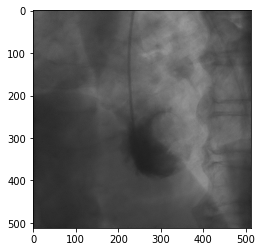

In [310]:
img_list = os.listdir(image_folder)
print(img_list[0])
image = cv2.imread(os.path.join(image_folder, img_list[0]))
assert(image.shape[:2] == (512,512))
print("image size:", image.shape)
plt.imshow(image)

## If the size is not 512*512

resized image size: (512, 512, 3)


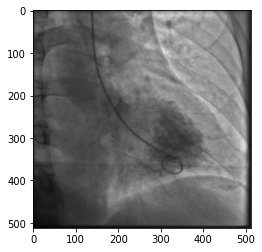

In [6]:
# for i in img_list:
#     image = cv2.imread(os.path.join(image_folder, i))
#     image = cv2.resize(image, (target_height, target_width))
#     cv2.imwrite(os.path.join(image_folder, i), image)
    
# print("resized image size:", image.shape)
# plt.imshow(image)

In [ ]:
# for dcm_file in glob2.glob(dcm_path + '*.dcm'):
#     print(dcm_file)
#     last_dirname = os.path.dirname(dcm_file)[-4:]
#     image_folder = os.path.join(img_path, last_dirname)
#     if not os.path.isdir(image_folder):
#         os.makedirs(image_folder, exist_ok=True)
#     ds = pydicom.read_file(dcm_file)
#     imgs = ds.pixel_array
#     for i,j in enumerate(imgs):
#         image_fn = '%.5d.jpg' % i
#         image_path = os.path.join(image_folder, image_fn)
#         cv2.imwrite(image_path, j)
#     #print(os.path.basename(dcm_file))